<a href="https://colab.research.google.com/github/Mabukhanpathan/Blossom_Vision/blob/main/BlossomVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define the function to predict the class of an image
def predict_disease(model, test_image):
    # Load and preprocess the image
    img = cv2.imread(test_image)
    if img is None:
        raise ValueError(f"Image at path '{test_image}' not found or could not be loaded.")

    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = cv2.resize(img, (299, 299))  # Resize to match model input size
    img = img.reshape(1, 299, 299, 3)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img)
    pred_class = np.argmax(prediction, axis=-1)[0]
    confidence = np.max(prediction)

    return pred_class, confidence

# Load the model
model_path = '/content/flower-classification/Trained_Data/Xception.h5'
model = load_model(model_path)

# Define your class labels
flower_labels = {
    'astilbe': 0,
    'bellflower': 1,
    'black_eyed_susan': 2,
    'calendula': 3,
    'california_poppy': 4,
    'carnation': 5,
    'common_daisy': 6,
    'coreopsis': 7,
    'dandelion': 8,
    'iris': 9,
    'rose': 10,
    'sunflower': 11,
    'tulip': 12,
    'water_lily': 13
}
keys = list(flower_labels.keys())  # Ensure this matches your model's output classes

# Predict the class and confidence of an image
img_path = '/content/flower-classification/train/astilbe/1052219251_d03970e956_c.jpg'
try:
    pred_class, confidence = predict_disease(model, img_path)
    class_name = keys[pred_class]
    print(f'The detected class is {class_name} with confidence: {confidence:.2f}')
except ValueError as e:
    print(e)

# Display the image with predicted class
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for displaying with matplotlib
plt.imshow(img_rgb)
plt.title(f'Predicted: {class_name}')
plt.axis('off')
plt.show()


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pathanmabukhan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/marquis03/flower-classification


100%|██████████| 205M/205M [00:02<00:00, 91.6MB/s]



Found 10919 images belonging to 14 classes.
Found 2723 images belonging to 14 classes.


In [ ]:
# Define the model
input_shape = (299, 299, 3)
base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(len(train_data.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, epochs=10, validation_data=val_data, batch_size=16)

# Save the model
model_path = '/content/flower-classification/Trained_Data/Xception.h5'
model.save(model_path)


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


683/683 ━━━━━━━━━━━━━━━━━━━━ 485s 622ms/step - accuracy: 0.4647 - loss: 1.6825 - val_accuracy: 0.6559 - val_loss: 1.3083
Epoch 2/10
683/683 ━━━━━━━━━━━━━━━━━━━━ 388s 566ms/step - accuracy: 0.8183 - loss: 0.5983 - val_accuracy: 0.8571 - val_loss: 0.5133
Epoch 3/10
683/683 ━━━━━━━━━━━━━━━━━━━━ 385s 560ms/step - accuracy: 0.8705 - loss: 0.4360 - val_accuracy: 0.8399 - val_loss: 0.5321
Epoch 4/10
683/683 ━━━━━━━━━━━━━━━━━━━━ 386s 561ms/step - accuracy: 0.8796 - loss: 0.4056 - val_accuracy: 0.7609 - val_loss: 1.1345
Epoch 5/10
683/683 ━━━━━━━━━━━━━━━━━━━━ 464s 595ms/step - accuracy: 0.8977 - loss: 0.3236 - val_accuracy: 0.8608 - val_loss: 0.5865
Epoch 6/10
683/683 ━━━━━━━━━━━━━━━━━━━━ 417s 557ms/step - accuracy: 0.9078 - loss: 0.2928 - val_accuracy: 0.8836 - val_loss: 0.4265
Epoch 7/10
683/683 ━━━━━━━━━━━━━━━━━━━━ 443s 560ms/step - accuracy: 0.9121 - loss: 0.2751 - val_accuracy: 0.8766 - val_loss: 0.4328
Epoch 8/10
683/683 ━━━━━━━━━━━━━━━━━━━━ 386s 563ms/step - accuracy: 0.9223 - loss: 0.24

171/171 ━━━━━━━━━━━━━━━━━━━━ 63s 333ms/step
                  precision    recall  f1-score   support

         astilbe       0.07      0.08      0.08       145
      bellflower       0.05      0.06      0.05       174
black_eyed_susan       0.07      0.08      0.07       197
       calendula       0.06      0.07      0.06       202
california_poppy       0.07      0.05      0.06       204
       carnation       0.08      0.05      0.06       184
    common_daisy       0.07      0.10      0.08       195
       coreopsis       0.10      0.09      0.09       207
       dandelion       0.07      0.07      0.07       207
            iris       0.07      0.07      0.07       208
            rose       0.05      0.05      0.05       197
       sunflower       0.08      0.08      0.08       202
           tulip       0.08      0.08      0.08       206
      water_lily       0.05      0.04      0.04       195

        accuracy                           0.07      2723
       macro avg       0.0

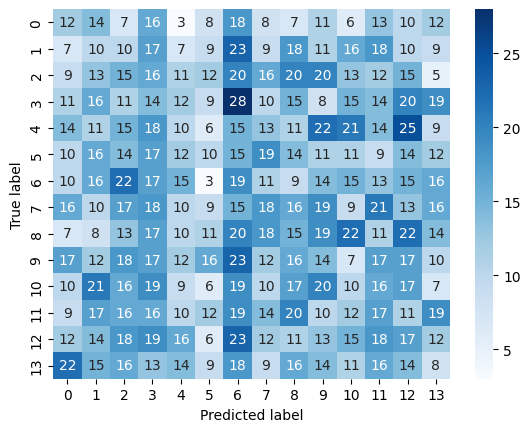

In [ ]:
# Load the model
if os.path.isfile(model_path):
    model = load_model(model_path)
else:
    raise FileNotFoundError(f"Model file not found at {model_path}")

# Predict on validation data
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = val_data.classes

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=list(train_data.class_indices.keys()))
print(report)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
def predict_disease(model, test_image):
    img = cv2.imread(test_image)
    if img is None:
        raise ValueError(f"Image at path '{test_image}' not found or could not be loaded.")

    img = img / 255.0
    img = cv2.resize(img, (299, 299))
    img = img.reshape(1, 299, 299, 3)
    prediction = model.predict(img)
    pred_class = np.argmax(prediction, axis=-1)[0]
    confidence = np.max(prediction)

    return pred_class, confidence

# Example prediction
img_path = '/content/flower-classification/train/astilbe/1052219251_d03970e956_c.jpg'
try:
    pred_class, confidence = predict_disease(model, img_path)
    class_name = list(train_data.class_indices.keys())[pred_class]
    print(f'The detected class is {class_name} with confidence: {confidence:.2f}')
except ValueError as e:
    print(e)

# Display the image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f'Predicted: {class_name}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The detected class is astilbe with confidence: 0.97


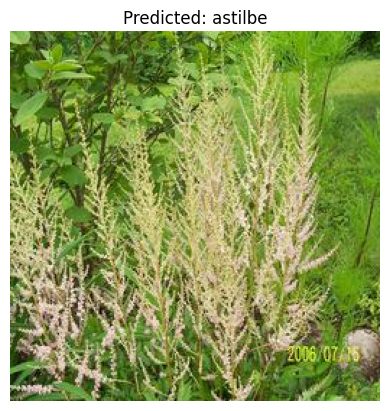

In [ ]:
def predict_disease(model, test_image):
    img = cv2.imread(test_image)
    if img is None:
        raise ValueError(f"Image at path '{test_image}' not found or could not be loaded.")

    img = img / 255.0
    img = cv2.resize(img, (299, 299))
    img = img.reshape(1, 299, 299, 3)
    prediction = model.predict(img)
    pred_class = np.argmax(prediction, axis=-1)[0]
    confidence = np.max(prediction)

    return pred_class, confidence

# Example prediction
img_path = '/content/flower-classification/train/astilbe/1052219251_d03970e956_c.jpg'
try:
    pred_class, confidence = predict_disease(model, img_path)
    class_name = list(train_data.class_indices.keys())[pred_class]
    print(f'The detected class is {class_name} with confidence: {confidence:.2f}')
except ValueError as e:
    print(e)

# Display the image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f'Predicted: {class_name}')
plt.axis('off')
plt.show()
